In [71]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim import models
from gensim.models import Word2Vec
from tabulate import tabulate
import matplotlib.pyplot as plt

In [20]:
adj_string = "adorable adventurous aggressive agreeable alert alive amused angry annoyed annoying anxious arrogant ashamed attractive average awful bad beautiful better bewildered black bloody blue blue-eyed blushing bored brainy brave breakable bright busy calm careful cautious charming cheerful clean clear clever cloudy clumsy colorful combative comfortable concerned condemned confused cooperative courageous crazy creepy crowded cruel curious cute dangerous dark dead defeated defiant delightful depressed determined different difficult disgusted distinct disturbed dizzy doubtful drab dull eager easy elated elegant embarrassed enchanting encouraging energetic enthusiastic envious evil excited expensive exuberant fair faithful famous fancy fantastic fierce filthy fine foolish fragile frail frantic friendly frightened funny gentle gifted glamorous gleaming glorious good gorgeous graceful grieving grotesque grumpy handsome happy healthy helpful helpless hilarious homeless homely horrible hungry hurt ill important impossible inexpensive innocent inquisitive itchy jealous jittery jolly joyous kind lazy light lively lonely long lovely lucky magnificent misty modern motionless muddy mushy mysterious nasty naughty nervous nice nutty obedient obnoxious odd old-fashioned open outrageous outstanding panicky perfect plain pleasant poised poor powerful precious prickly proud putrid puzzled quaint real relieved repulsive rich scary selfish shiny shy silly sleepy smiling smoggy sore sparkling splendid spotless stormy strange stupid successful super talented tame tasty tender tense terrible thankful thoughtful thoughtless tired tough troubled ugliest ugly uninterested unsightly unusual upset uptight vast victorious vivacious wandering weary wicked wide-eyed wild witty worried worrisome wrong zany zealous"

adjs = adj_string.split()

In [21]:
df1960s = pd.read_csv('df1960s.csv', index_col=0)
df1970s = pd.read_csv('df1970s.csv', index_col=0)
df1980s = pd.read_csv('df1980s.csv', index_col=0)
df1990s = pd.read_csv('df1990s.csv', index_col=0)
df2000s = pd.read_csv('df2000s.csv', index_col=0)
df2010s = pd.read_csv('df2010s.csv', index_col=0)

In [22]:
def data_cleaning(decade):
    songs = []
    for index, row in decade.iterrows():
        cur_song = word_tokenize(str(row['Lyrics']))
        songs.append(cur_song)
    return songs

In [23]:
corpus1960s = data_cleaning(df1960s)
corpus1970s = data_cleaning(df1970s)
corpus1980s = data_cleaning(df1980s)
corpus1990s = data_cleaning(df1990s)
corpus2000s = data_cleaning(df2000s)
corpus2010s = data_cleaning(df2010s)

In [24]:
len(corpus1960s)

472

In [25]:
model1960 = Word2Vec(sentences = corpus1960s, window=4, min_count=5, workers=4, sg=1)
model1970 = Word2Vec(sentences = corpus1970s, window=4, min_count=5, workers=4, sg=1)
model1980 = Word2Vec(sentences = corpus1980s, window=4, min_count=5, workers=4, sg=1)
model1990 = Word2Vec(sentences = corpus1990s, window=4, min_count=5, workers=4, sg=1)
model2000 = Word2Vec(sentences = corpus2000s, window=4, min_count=5, workers=4, sg=1)
model2010 = Word2Vec(sentences = corpus2010s, window=4, min_count=5, workers=4, sg=1)

In [26]:
def corpusToSet(corpus):
    wordBank = set()
    for sentence in corpus:
        for word in sentence:
            wordBank.add(word)
    return wordBank

In [27]:
wordBank60s = corpusToSet(corpus1960s)
wordBank70s = corpusToSet(corpus1970s)
wordBank80s = corpusToSet(corpus1980s)
wordBank90s = corpusToSet(corpus1990s)
wordBank00s = corpusToSet(corpus2000s)
wordBank10s = corpusToSet(corpus2010s)

In [28]:
def getDistances(model, bank, key, adjOnly=False):
    distances = dict()
    for word in bank:
        if(word in adjs) or (adjOnly==False):
            if word in model.wv.index_to_key:
                dist = model.wv.distance(word, key)
                distances[word]=dist
    sortedDistances = dict(sorted(distances.items(), key=lambda item: item[1]))
    return sortedDistances
    

In [29]:
girl60 = getDistances(model1960, wordBank60s, 'girl', adjOnly = True)
girl70 = getDistances(model1970, wordBank70s, 'girl', adjOnly = True)
girl80 = getDistances(model1980, wordBank80s, 'girl', adjOnly = True)
girl90 = getDistances(model1990, wordBank90s, 'girl', adjOnly = True)
girl00 = getDistances(model2000, wordBank00s, 'girl', adjOnly = True)
girl10 = getDistances(model2010, wordBank10s, 'girl', adjOnly = True)

In [30]:
wom60 = getDistances(model1960, wordBank60s, 'woman', adjOnly = True)
wom70 = getDistances(model1970, wordBank70s, 'woman', adjOnly = True)
wom80 = getDistances(model1980, wordBank80s, 'woman', adjOnly = True)
wom90 = getDistances(model1990, wordBank90s, 'woman', adjOnly = True)
wom00 = getDistances(model2000, wordBank00s, 'woman', adjOnly = True)
wom10 = getDistances(model2010, wordBank10s, 'woman', adjOnly = True)

In [31]:
boy60 = getDistances(model1960, wordBank60s, 'boy', adjOnly = True)
boy70 = getDistances(model1970, wordBank70s, 'boy', adjOnly = True)
boy80 = getDistances(model1980, wordBank80s, 'boy', adjOnly = True)
boy90 = getDistances(model1990, wordBank90s, 'boy', adjOnly = True)
boy00 = getDistances(model2000, wordBank00s, 'boy', adjOnly = True)
boy10 = getDistances(model2010, wordBank10s, 'boy', adjOnly = True)

In [32]:
man60 = getDistances(model1960, wordBank60s, 'man', adjOnly = True)
man70 = getDistances(model1970, wordBank70s, 'man', adjOnly = True)
man80 = getDistances(model1980, wordBank80s, 'man', adjOnly = True)
man90 = getDistances(model1990, wordBank90s, 'man', adjOnly = True)
man00 = getDistances(model2000, wordBank00s, 'man', adjOnly = True)
man10 = getDistances(model2010, wordBank10s, 'man', adjOnly = True)

In [33]:
col_names = ['Rank','1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
girl_data = [[1, list(girl60.keys())[0], list(girl70.keys())[0], list(girl80.keys())[0], list(girl90.keys())[0], list(girl00.keys())[0], list(girl10.keys())[0]],
            [2, list(girl60.keys())[1], list(girl70.keys())[1], list(girl80.keys())[1], list(girl90.keys())[1], list(girl00.keys())[1], list(girl10.keys())[1]],
            [3, list(girl60.keys())[2], list(girl70.keys())[2], list(girl80.keys())[2], list(girl90.keys())[2], list(girl00.keys())[2], list(girl10.keys())[2]],
            [4, list(girl60.keys())[3], list(girl70.keys())[3], list(girl80.keys())[3], list(girl90.keys())[3], list(girl00.keys())[3], list(girl10.keys())[3]],
            [5, list(girl60.keys())[4], list(girl70.keys())[4], list(girl80.keys())[4], list(girl90.keys())[4], list(girl00.keys())[4], list(girl10.keys())[4]]]

print(tabulate(girl_data, headers=col_names, tablefmt="fancy_grid"))

╒════════╤═════════╤═════════╤═════════╤═════════╤═══════════╤═══════════╕
│   Rank │ 1960s   │ 1970s   │ 1980s   │ 1990s   │ 2000s     │ 2010s     │
╞════════╪═════════╪═════════╪═════════╪═════════╪═══════════╪═══════════╡
│      1 │ proud   │ rich    │ naughty │ kind    │ naughty   │ perfect   │
├────────┼─────────┼─────────┼─────────┼─────────┼───────────┼───────────┤
│      2 │ foolish │ nice    │ kind    │ angry   │ dangerous │ proud     │
├────────┼─────────┼─────────┼─────────┼─────────┼───────────┼───────────┤
│      3 │ ugly    │ fine    │ nice    │ funny   │ happy     │ fine      │
├────────┼─────────┼─────────┼─────────┼─────────┼───────────┼───────────┤
│      4 │ fine    │ lonely  │ perfect │ perfect │ fine      │ beautiful │
├────────┼─────────┼─────────┼─────────┼─────────┼───────────┼───────────┤
│      5 │ nice    │ bad     │ real    │ better  │ tough     │ different │
╘════════╧═════════╧═════════╧═════════╧═════════╧═══════════╧═══════════╛


In [34]:
woman_data = [[1, list(wom60.keys())[0], list(wom70.keys())[0], list(wom80.keys())[0], list(wom90.keys())[0], list(wom00.keys())[0], list(wom10.keys())[0]],
            [2, list(wom60.keys())[1], list(wom70.keys())[1], list(wom80.keys())[1], list(wom90.keys())[1], list(wom00.keys())[1], list(wom10.keys())[1]],
            [3, list(wom60.keys())[2], list(wom70.keys())[2], list(wom80.keys())[2], list(wom90.keys())[2], list(wom00.keys())[2], list(wom10.keys())[2]],
            [4, list(wom60.keys())[3], list(wom70.keys())[3], list(wom80.keys())[3], list(wom90.keys())[3], list(wom00.keys())[3], list(wom10.keys())[3]],
            [5, list(wom60.keys())[4], list(wom70.keys())[4], list(wom80.keys())[4], list(wom90.keys())[4], list(wom00.keys())[4], list(wom10.keys())[4]]]

print(tabulate(woman_data, headers=col_names, tablefmt="fancy_grid"))

╒════════╤═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│   Rank │ 1960s   │ 1970s     │ 1980s     │ 1990s     │ 2000s     │ 2010s     │
╞════════╪═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│      1 │ bad     │ clean     │ lovely    │ crazy     │ busy      │ worried   │
├────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│      2 │ easy    │ tired     │ naughty   │ dangerous │ clumsy    │ dangerous │
├────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│      3 │ wrong   │ beautiful │ perfect   │ calm      │ angry     │ strange   │
├────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│      4 │ nice    │ real      │ fine      │ ill       │ expensive │ precious  │
├────────┼─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│      5 │ proud   │ plain     │ glamorous │ tough     │ healthy   │ funny     │
╘════════╧═════════╧════════

In [35]:
boy_data = [[1, list(boy60.keys())[0], list(boy70.keys())[0], list(boy80.keys())[0], list(boy90.keys())[0], list(boy00.keys())[0], list(boy10.keys())[0]],
            [2, list(boy60.keys())[1], list(boy70.keys())[1], list(boy80.keys())[1], list(boy90.keys())[1], list(boy00.keys())[1], list(boy10.keys())[1]],
            [3, list(boy60.keys())[2], list(boy70.keys())[2], list(boy80.keys())[2], list(boy90.keys())[2], list(boy00.keys())[2], list(boy10.keys())[2]],
            [4, list(boy60.keys())[3], list(boy70.keys())[3], list(boy80.keys())[3], list(boy90.keys())[3], list(boy00.keys())[3], list(boy10.keys())[3]],
            [5, list(boy60.keys())[4], list(boy70.keys())[4], list(boy80.keys())[4], list(boy90.keys())[4], list(boy00.keys())[4], list(boy10.keys())[4]]]

print(tabulate(boy_data, headers=col_names, tablefmt="fancy_grid"))

╒════════╤══════════╤═════════╤═════════╤══════════╤═════════╤═══════════╕
│   Rank │ 1960s    │ 1970s   │ 1980s   │ 1990s    │ 2000s   │ 2010s     │
╞════════╪══════════╪═════════╪═════════╪══════════╪═════════╪═══════════╡
│      1 │ tame     │ lonely  │ wild    │ confused │ tasty   │ worried   │
├────────┼──────────┼─────────┼─────────┼──────────┼─────────┼───────────┤
│      2 │ super    │ rich    │ lovely  │ hurt     │ rich    │ dangerous │
├────────┼──────────┼─────────┼─────────┼──────────┼─────────┼───────────┤
│      3 │ strange  │ blue    │ dead    │ bad      │ super   │ crazy     │
├────────┼──────────┼─────────┼─────────┼──────────┼─────────┼───────────┤
│      4 │ black    │ poor    │ funny   │ silly    │ fine    │ nasty     │
├────────┼──────────┼─────────┼─────────┼──────────┼─────────┼───────────┤
│      5 │ confused │ funny   │ nice    │ smiling  │ easy    │ easy      │
╘════════╧══════════╧═════════╧═════════╧══════════╧═════════╧═══════════╛


In [36]:
man_data = [[1, list(man60.keys())[0], list(man70.keys())[0], list(man80.keys())[0], list(man90.keys())[0], list(man00.keys())[0], list(man10.keys())[0]],
            [2, list(man60.keys())[1], list(man70.keys())[1], list(man80.keys())[1], list(man90.keys())[1], list(man00.keys())[1], list(man10.keys())[1]],
            [3, list(man60.keys())[2], list(man70.keys())[2], list(man80.keys())[2], list(man90.keys())[2], list(man00.keys())[2], list(man10.keys())[2]],
            [4, list(man60.keys())[3], list(man70.keys())[3], list(man80.keys())[3], list(man90.keys())[3], list(man00.keys())[3], list(man10.keys())[3]],
            [5, list(man60.keys())[4], list(man70.keys())[4], list(man80.keys())[4], list(man90.keys())[4], list(man00.keys())[4], list(man10.keys())[4]]]

print(tabulate(man_data, headers=col_names, tablefmt="fancy_grid"))

╒════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╕
│   Rank │ 1960s   │ 1970s    │ 1980s   │ 1990s   │ 2000s   │ 2010s   │
╞════════╪═════════╪══════════╪═════════╪═════════╪═════════╪═════════╡
│      1 │ dead    │ innocent │ nice    │ good    │ worried │ nice    │
├────────┼─────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│      2 │ alive   │ misty    │ lovely  │ lucky   │ hungry  │ rich    │
├────────┼─────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│      3 │ kind    │ foolish  │ strange │ funny   │ stupid  │ worried │
├────────┼─────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│      4 │ famous  │ clean    │ excited │ tough   │ tough   │ stupid  │
├────────┼─────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│      5 │ rich    │ strange  │ careful │ kind    │ fair    │ bloody  │
╘════════╧═════════╧══════════╧═════════╧═════════╧═════════╧═════════╛


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def getSentiment(closest, n):
    analyzer = SentimentIntensityAnalyzer()
    closestString = ''
    for i in range(n):
        closestString+=list(closest.keys())[i]
        closestString +=" "
    return analyzer.polarity_scores(closestString)

In [100]:
def fillListGirl(sent, n):
    fList = []
    fList.append(getSentiment(girl60, n)[sent])
    fList.append(getSentiment(girl70, n)[sent])
    fList.append(getSentiment(girl80, n)[sent])
    fList.append(getSentiment(girl90, n)[sent])
    fList.append(getSentiment(girl00, n)[sent])
    fList.append(getSentiment(girl10, n)[sent])
    return fList

In [101]:
def fillListBoy(sent, n):
    fList = []
    fList.append(getSentiment(boy60, n)[sent])
    fList.append(getSentiment(boy70, n)[sent])
    fList.append(getSentiment(boy80, n)[sent])
    fList.append(getSentiment(boy90, n)[sent])
    fList.append(getSentiment(boy00, n)[sent])
    fList.append(getSentiment(boy10, n)[sent])
    return fList

In [102]:
def fillListWoman(sent, n):
    fList = []
    fList.append(getSentiment(wom60, n)[sent])
    fList.append(getSentiment(wom70, n)[sent])
    fList.append(getSentiment(wom80, n)[sent])
    fList.append(getSentiment(wom90, n)[sent])
    fList.append(getSentiment(wom00, n)[sent])
    fList.append(getSentiment(wom10, n)[sent])
    return fList

In [103]:
def fillListMan(sent, n):
    fList = []
    fList.append(getSentiment(man60, n)[sent])
    fList.append(getSentiment(man70, n)[sent])
    fList.append(getSentiment(man80, n)[sent])
    fList.append(getSentiment(man90, n)[sent])
    fList.append(getSentiment(man00, n)[sent])
    fList.append(getSentiment(man10, n)[sent])
    return fList

In [106]:
years=[1960, 1970, 1980, 1990, 2000, 2010]

n=40

girlAllSentPos = fillListGirl('pos', n)
girlAllSentNeu= fillListGirl('neu', n)
girlAllSentNeg= fillListGirl('neg', n)

boyAllSentPos = fillListBoy('pos', n)
boyAllSentNeu= fillListBoy('neu', n)
boyAllSentNeg= fillListBoy('neg', n)

womAllSentPos = fillListWoman('pos', n)
womAllSentNeu= fillListWoman('neu', n)
womAllSentNeg= fillListWoman('neg', n)

manAllSentPos = fillListMan('pos', n)
manAllSentNeu= fillListMan('neu', n)
manAllSentNeg= fillListMan('neg', n)

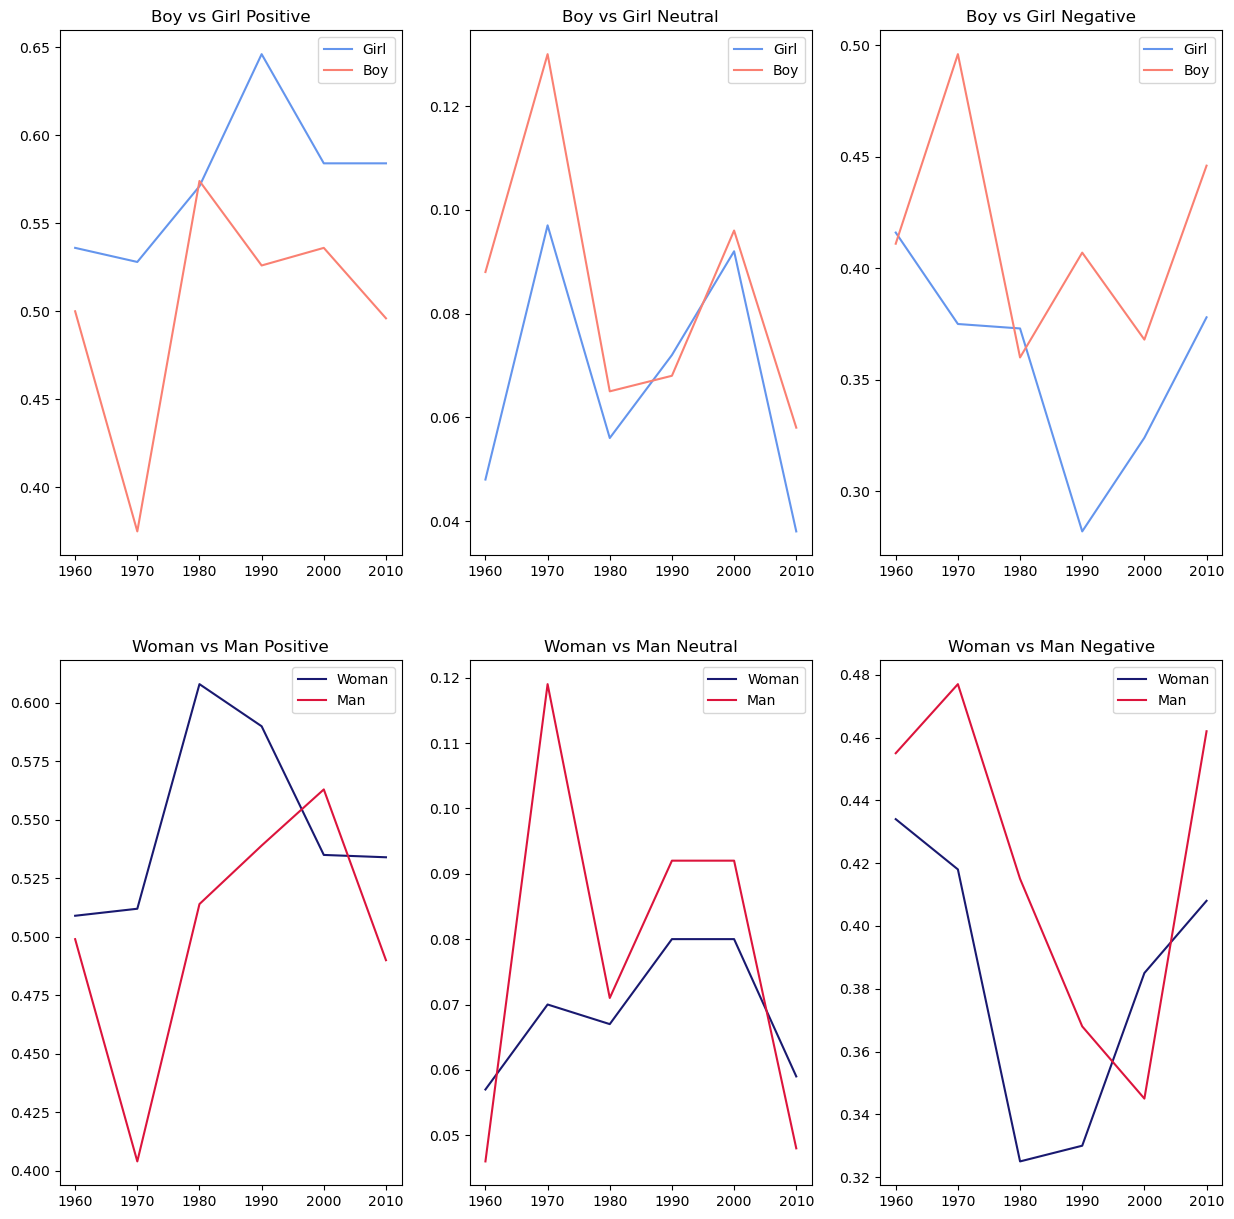

In [114]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

axs[0][0].plot(years, girlAllSentPos, label = "Girl", color='cornflowerblue') 
axs[0][0].plot(years, boyAllSentPos, label = "Boy", color='salmon') 
axs[0][0].set_title('Boy vs Girl Positive')
axs[0][0].legend()

axs[0][1].plot(years, girlAllSentNeu, label = "Girl", color='cornflowerblue') 
axs[0][1].plot(years, boyAllSentNeu, label = "Boy", color='salmon') 
axs[0][1].set_title('Boy vs Girl Neutral')
axs[0][1].legend()

axs[0][2].plot(years, girlAllSentNeg, label = "Girl", color='cornflowerblue') 
axs[0][2].plot(years, boyAllSentNeg, label = "Boy", color='salmon') 
axs[0][2].set_title('Boy vs Girl Negative')
axs[0][2].legend()

axs[1][0].plot(years, womAllSentPos, label = "Woman", color='midnightblue') 
axs[1][0].plot(years, manAllSentPos, label = "Man", color='crimson') 
axs[1][0].set_title('Woman vs Man Positive')
axs[1][0].legend()

axs[1][1].plot(years, womAllSentNeu, label = "Woman", color='midnightblue') 
axs[1][1].plot(years, manAllSentNeu, label = "Man", color='crimson') 
axs[1][1].set_title('Woman vs Man Neutral')
axs[1][1].legend()

axs[1][2].plot(years, womAllSentNeg, label = "Woman", color='midnightblue') 
axs[1][2].plot(years, manAllSentNeg, label = "Man", color='crimson') 
axs[1][2].set_title('Woman vs Man Negative')
axs[1][2].legend()

plt.show()